In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
datafile=pd.read_csv("PreProcessed_Placement.csv")

In [3]:
datafile

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1.0      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2.0      M  79.33  Central  78.33   Others   Science     77.48   
2      3.0      M  65.00  Central  68.00  Central      Arts     64.00   
3      4.0      M  56.00  Central  52.00  Central   Science     52.00   
4      5.0      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210  211.0      M  80.60   Others  82.00   Others  Commerce     77.60   
211  212.0      M  58.00   Others  60.00   Others   Science     72.00   
212  213.0      M  67.00   Others  67.00   Others  Commerce     73.00   
213  214.0      F  74.00   Others  66.00   Others  Commerce     58.00   
214  215.0      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1     Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2    Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3     Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       0.0  
4    Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  
..         ...    ...      ...            ...    ...         ...       ...  
210  Comm&Mgmt     No     91.0        Mkt&Fin  74.49      Placed  400000.0  
211   Sci&Tech     No     74.0        Mkt&Fin  53.62      Placed  275000.0  
212  Comm&Mgmt    Yes     59.0        Mkt&Fin  69.72      Placed  295000.0  
213  Comm&Mgmt     No     70.0         Mkt&HR  60.23      Placed  204000.0  
214  Comm&Mgmt     No     89.0         Mkt&HR  60.22  Not Placed       0.0  

[215 rows x 15 columns]

In [4]:
datafile.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [5]:
datafile.drop("sl_no",inplace=True,axis=1)

In [6]:
from Univeriate_class import univeriate
quan,qual=univeriate.quanqual(datafile)

In [7]:
datafile[quan].cov()

ssc_p          hsc_p       degree_p        etest_p  \
ssc_p        117.228377      60.348373      42.897137      37.659225   
hsc_p         60.348373     118.755706      34.819820      35.461678   
degree_p      42.897137      34.819820      54.151103      21.929469   
etest_p       37.659225      35.461678      21.929469     176.251018   
mba_p         24.535952      22.555846      17.272020      16.886973   
salary    901754.893936  763359.777657  465131.504238  384234.419257   

                  mba_p        salary  
ssc_p         24.535952  9.017549e+05  
hsc_p         22.555846  7.633598e+05  
degree_p      17.272020  4.651315e+05  
etest_p       16.886973  3.842344e+05  
mba_p         34.028376  1.262455e+05  
salary    126245.485547  2.395714e+10

# estest_p in mba_p variation is 16.886973. so it is positive covariance.

# degree_p in estest_p variation is 21.929469. so it is positive covariance.

In [8]:
datafile[quan].corr()

ssc_p     hsc_p  degree_p   etest_p     mba_p    salary
ssc_p     1.000000  0.511472  0.538404  0.261993  0.388478  0.538090
hsc_p     0.511472  1.000000  0.434206  0.245113  0.354823  0.452569
degree_p  0.538404  0.434206  1.000000  0.224470  0.402364  0.408371
etest_p   0.261993  0.245113  0.224470  1.000000  0.218055  0.186988
mba_p     0.388478  0.354823  0.402364  0.218055  1.000000  0.139823
salary    0.538090  0.452569  0.408371  0.186988  0.139823  1.000000

# mba_p in salary similarity is 0.139823. so it is positive correlation.

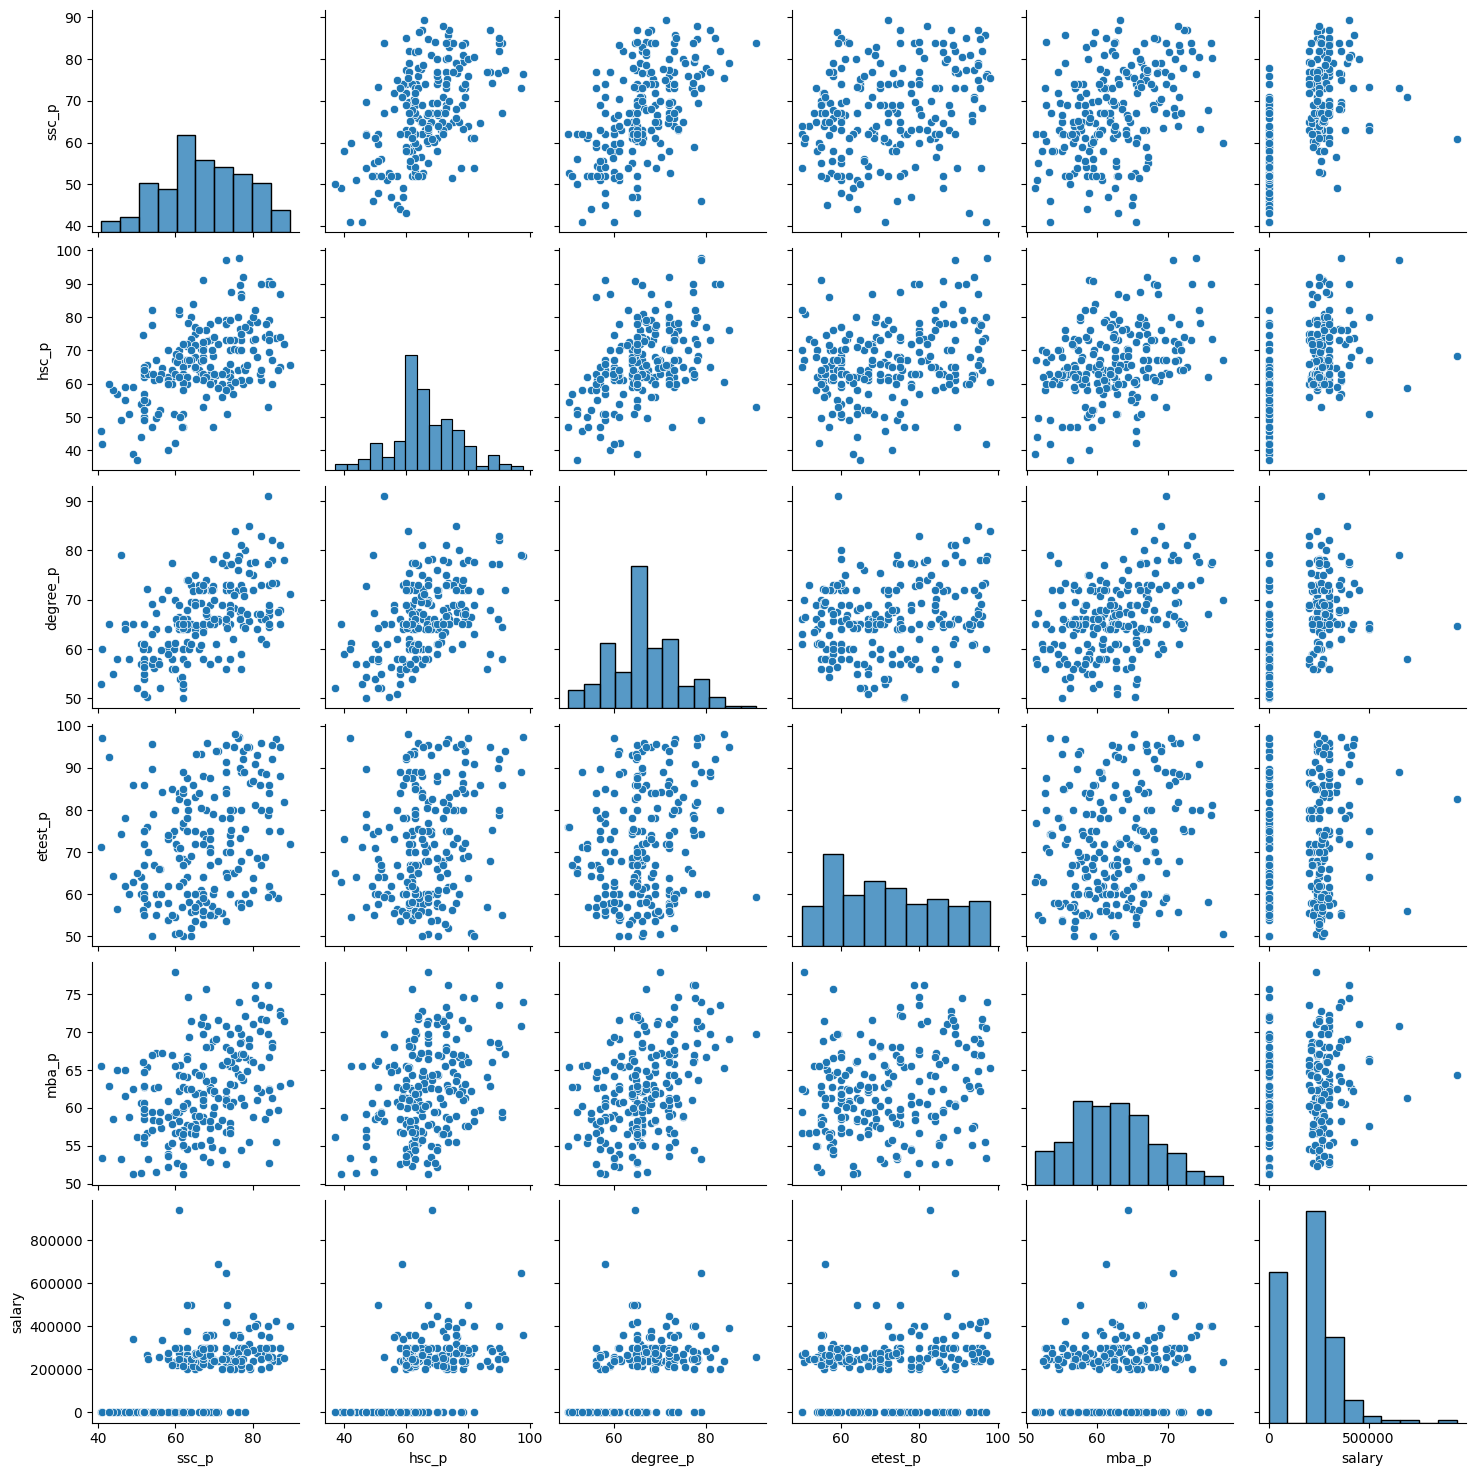

In [9]:
sb.pairplot(datafile)

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# This imports the "variance_inflation_factor" function from the statsmodels library.
def calc_vif(X):
# Defines a function named "calc_vif" that takes one argument X.
    vif = pd.DataFrame()
    # Creates an empty DataFrame called vif to store the results.
    vif["variables"] = X.columns
    # Adds a column named "variables" to the vif DataFrame, containing the names of the features from X.
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    # This is the core computation: 
                    # X.values converts the DataFrame to a NumPy array.
                    # X.shape[1] gives the number of columns (features).
                    # For each feature index i, it calculates the VIF using variance_inflation_factor.
                    # The result is a list of VIF values, which is stored in the "VIF" column.
    return vif
    # return the final output to the vif dataframe.

In [11]:
calc_vif(datafile[quan])

variables         VIF
0     ssc_p   76.496603
1     hsc_p   58.972066
2  degree_p  113.299298
3   etest_p   32.679659
4     mba_p  114.025972
5    salary    3.931112

# Correlation Matrix: 
   
A simple but effective way to spot pairwise multicollinearity.
Look for correlation coefficients close to ±1

             ssc_p     hsc_p  degree_p   etest_p     mba_p    salary
ssc_p     1.000000  0.511472  0.538404  0.261993  0.388478  0.538090
hsc_p     0.511472  1.000000  0.434206  0.245113  0.354823  0.452569
degree_p  0.538404  0.434206  1.000000  0.224470  0.402364  0.408371
etest_p   0.261993  0.245113  0.224470  1.000000  0.218055  0.186988
mba_p     0.388478  0.354823  0.402364  0.218055  1.000000  0.139823
salary    0.538090  0.452569  0.408371  0.186988  0.139823  1.000000


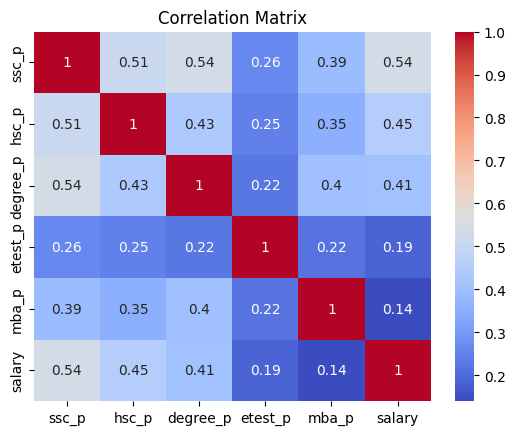

In [12]:
corr_matrix = datafile[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']].corr()
print(corr_matrix)
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Condition Number:
    
This checks for near-linear dependencies in the design matrix.
A condition number > 30 suggests multicollinearity.

In [13]:
from numpy.linalg import cond

X = datafile[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']]
condition_number = cond(X.values)
print("Condition Number:", condition_number)

Condition Number: 29.888380486929737


# Eigenvalues of the Correlation Matrix:

Small eigenvalues indicate multicollinearity.
If any eigenvalue is close to zero, it means some variables are linearly dependent.

In [14]:
eigenvalues, _ = np.linalg.eig(corr_matrix)
print("Eigenvalues:", eigenvalues)

Eigenvalues: [2.83492092 0.39332472 0.47410541 0.56163842 0.90975497 0.82625555]


# Ridge Regression (to handle multicollinearity):

Instead of removing variables, you can regularize them.
Ridge regression shrinks coefficients to reduce the impact of multicollinearity.

In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X = datafile[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']]
y = datafile['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge Coefficients:", ridge.coef_)

Ridge Coefficients: [ 5038.12574724  3689.85685153  3950.27535068   598.35065505
 -4124.94846412]


# Principal Component Analysis (PCA):

Transforms correlated variables into uncorrelated components.
Use PCA components instead of raw features in your regression model.

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.49504345 0.16971173 0.13496138 0.1121676  0.08811583]


# T-test

Unpaired test (Independent)

In [17]:
from scipy.stats import ttest_ind
Other=datafile[datafile['ssc_b']=='Others']['salary']
Central=datafile[datafile['ssc_b']=='Central']['salary']
ttest_ind (Other,Central)

TtestResult(statistic=np.float64(0.505185285363673), pvalue=np.float64(0.6139510180995318), df=np.float64(213.0))

Paired test (Dependent)

In [18]:
from scipy.stats import ttest_rel
Commerce=datafile[datafile['hsc_s']=='Commerce']['mba_p']
Commerce1=datafile[datafile['hsc_s']=='Commerce']['etest_p']
ttest_rel (Commerce,Commerce1)

TtestResult(statistic=np.float64(-7.868552092606871), pvalue=np.float64(2.462926468454984e-12), df=np.int64(112))

# ANAVO (Analysis of Variance)

In [19]:
import scipy.stats as stats
stats.f_oneway(datafile["ssc_p"],datafile["hsc_p"],datafile["degree_p"])

F_onewayResult(statistic=np.float64(0.6719700864663096), pvalue=np.float64(0.5110602818995302))

- The null hypothesis (H₀) states that the group means are equal.
- Since the p-value (0.511) is greater than 0.05, we fail to reject the null hypothesis.

There is no statistically significant difference between the group means.
The factor tested does not have a significant effect on the dependent variable.

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

datafile['ssc_b'] = datafile['ssc_b'].astype('category')
datafile['hsc_b'] = datafile['hsc_b'].astype('category')

model = ols('mba_p ~ C(ssc_b) + C(hsc_b) + C(ssc_b):C(hsc_b)', data=datafile).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                        sum_sq     df         F    PR(>F)
C(ssc_b)              9.325085    1.0  0.272930  0.601921
C(hsc_b)             18.262416    1.0  0.534510  0.465528
C(ssc_b):C(hsc_b)     4.337090    1.0  0.126939  0.721983
Residual           7209.161274  211.0       NaN       NaN


- All p-values > 0.05, so we fail to reject the null hypotheses.
- This means:
    - Neither ssc_b nor hsc_b significantly affects mba_p.
    - Their combination (interaction) also has no significant effect.